# Parameter Optimisation for Three-Dimensional Printers’ Print Quality

In [1]:
# importing dataset from the github repo
%%bash
git clone https://github.com/tapashreepradhan/semester-project-H02V8a.git

Cloning into 'semester-project-H02V8a'...


In [9]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

## 1. Data loading and visualization:

Preliminary data visualization of the experimental values via normal distribution curves.

In [3]:
df = pd.read_csv("./semester-project-H02V8a/3d-printer-dataset-two-level.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   layer_height (A)         48 non-null     float64
 1   nozzle temperature (B)   48 non-null     int64  
 2   bed_temperature (C)      48 non-null     int64  
 3   fan_speed (D)            48 non-null     int64  
 4   roughness                48 non-null     int64  
 5   tension_strength         48 non-null     float64
 6   elongation               48 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 2.8 KB


In [5]:
# independent variables
x_df = df.iloc[:, [0, 1, 2, 3]]
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   layer_height (A)         48 non-null     float64
 1   nozzle temperature (B)   48 non-null     int64  
 2   bed_temperature (C)      48 non-null     int64  
 3   fan_speed (D)            48 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [6]:
# dependent variables
y_df = df.iloc[:, [4, 5, 6]]
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   roughness         48 non-null     int64  
 1   tension_strength  48 non-null     float64
 2   elongation        48 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


### a. Distribution plots of the dependent variables

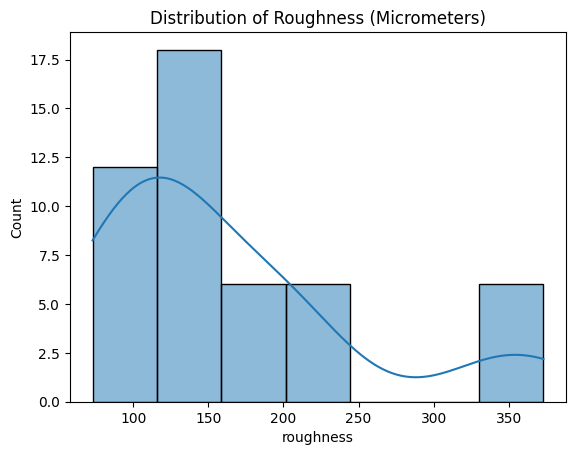

The data in roughness does not appear to be normally distributed (p-value=0.0000)


In [14]:
# Roughness Distribution

sns.histplot(y_df['roughness'], kde=True)
plt.title(f'Distribution of Roughness (Micrometers)')
plt.show()

from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(y_df['roughness'])

# Check the p-value
alpha = 0.05
if p_value > alpha:
    print(f'The data for Roughness appears to be normally distributed (p-value={p_value:.4f})')
else:
    print(f'The data for Roughness does not appear to be normally distributed (p-value={p_value:.4f})')

In [17]:
%%bash
cd semester-project-H02V8a/
mkdir distribution-plots
cd distribution-plots

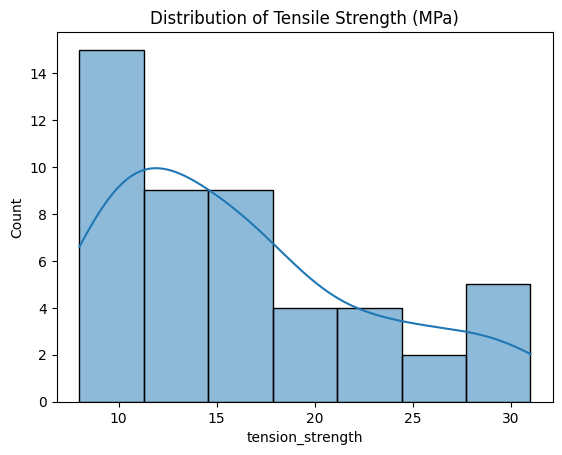

The data for Tensile Strength does not appear to be normally distributed (p-value=0.0007)


<Figure size 640x480 with 0 Axes>

In [19]:
# Tensile Strength Distribution

sns.histplot(y_df['tension_strength'], kde=True)
plt.title(f'Distribution of Tensile Strength (MPa)')
plt.show()

plt.savefig('./semester-project-H02V8a/distribution-plots/tensile-distribution.png')

from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(y_df['tension_strength'])

# Check the p-value
alpha = 0.05
if p_value > alpha:
    print(f'The data for Tensile Strength appears to be normally distributed (p-value={p_value:.4f})')
else:
    print(f'The data for Tensile Strength does not appear to be normally distributed (p-value={p_value:.4f})')


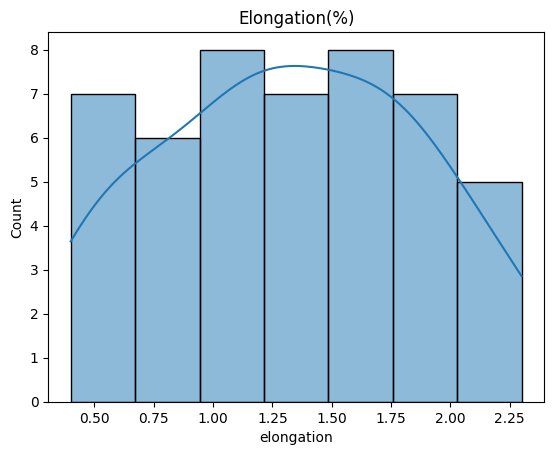

The data for Elongation appears to be normally distributed (p-value=0.1550)


<Figure size 640x480 with 0 Axes>

In [26]:
# Elongation Distribution

sns.histplot(y_df['elongation'], kde=True)
plt.title(f'Elongation(%)')
plt.show()
plt.savefig('./semester-project-H02V8a/distribution-plots/elongation.png')
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(y_df['elongation'])

# Check the p-value
alpha = 0.05
if p_value > alpha:
    print(f'The data for Elongation appears to be normally distributed (p-value={p_value:.4f})')
else:
    print(f'The data for Elongation does not appear to be normally distributed (p-value={p_value:.4f})')

## t-test:
To determine whether the coefficients and factors are of significance for the model and formulation of Null Hypothesis, $H_0$ and Alternative Hypothesis, $H_1$.